# <center> Confusion matrices for model evaluation on image </center>

https://stackoverflow.com/questions/65403367/confusion-matrix-for-values-labeled-as-tp-tn-fp-fn

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing variables <br>
iou_matrix is a matrix of the IoU of the detections after NMS and the groudtruth.

In [2]:
iou_matrix = np.load('../tables/iou_nms.npy')
scores_array = np.load('../tables/scores_array.npy')
detection_corners_nms = np.load('../tables/detection_corners_nms.npy')

In [3]:
print(f'\niou_matrix has a shape of {iou_matrix.shape}, the number of objects is {iou_matrix.shape[0]} \
and the number of detections is {iou_matrix.shape[1]}.\n')

print(f'scores_array is a vector with the detection probability for each sliding window of the image. \
Its length is {scores_array.shape[0]}.')


iou_matrix has a shape of (8812, 10696), the number of objects is 8812 and the number of detections is 10696.

scores_array is a vector with the detection probability for each sliding window of the image. Its length is 1574986.


## Confusion matrices computation

Number of detections = TP + FP <br>
Number of windows = TP + TN + FP + FN

In [4]:
print(f'The number of FP is around {iou_matrix.shape[1]-iou_matrix.shape[0]}.')

The number of FP is around 1884.


In [19]:
iou_threshold = 0.2

In [20]:
tp = ((iou_matrix > iou_threshold).sum(axis = 1) >=1).sum()
fn = ((iou_matrix > iou_threshold).sum(axis = 1) ==0).sum()
fp = ((iou_matrix > iou_threshold).sum(axis = 0) ==0).sum()
tn = scores_array.shape[0]-tp-fn-fp
print(tp,fn,fp,tn)

8773 39 1902 1564272


In [7]:
cm = [[tn, fp],[fn, tp]]
print(cm)

[[1564272, 1902], [39, 8773]]


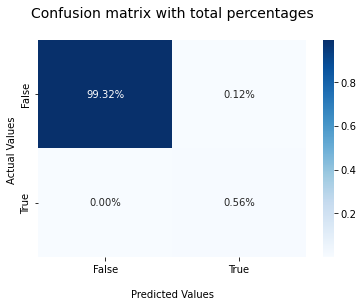

In [8]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%',)

ax.set_title('Confusion matrix with total percentages\n', fontsize=14);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

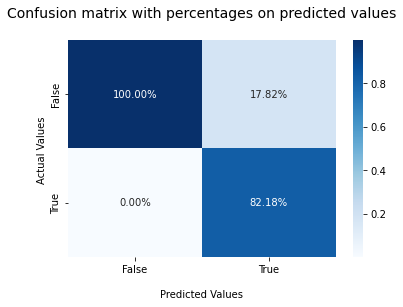

In [9]:
ax = sns.heatmap(cm/np.sum(cm, axis = 0), annot=True, cmap='Blues', fmt='.2%',)

ax.set_title('Confusion matrix with percentages on predicted values\n', fontsize=14);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

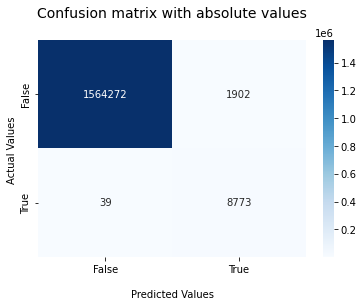

In [10]:
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',)

ax.set_title('Confusion matrix with absolute values\n', fontsize=14);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [11]:
cm_array = np.asarray(cm)

In [12]:
cm_array.shape
cm = cm_array

In [13]:
cm1 = [[ cm[0,0]/np.sum(cm, axis = 1)[0], cm[0,1]/np.sum(cm, axis = 1)[0]], [cm[1,0]/np.sum(cm, axis = 1)[1],cm[1,1]/np.sum(cm, axis = 1)[1]]]

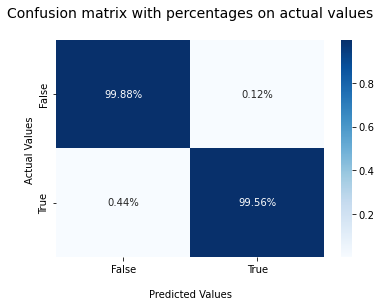

In [14]:
ax = sns.heatmap(cm1, annot=True, cmap='Blues', fmt='.2%')

ax.set_title('Confusion matrix with percentages on actual values\n', fontsize=14);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Metrics of the model

In [15]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_score = 2/(1/recall + 1/precision)

print('The precision is:  %.2f %%\n' % (precision*100))
print('The recall is: %.2f %%\n' % (recall*100))
print(f'The F1_score is: %.2f %%\n' % (F1_score*100))

The precision is:  82.18 %

The recall is: 99.56 %

The F1_score is: 90.04 %



In [16]:
print('End of notebook!')

End of notebook!
